# Week 2 - Project 1
###### Team 5 - Sanjivek & Georgia

### Goal: Identify and load a network dataset (that has categorical information per node). For each of the nodes , calculate degree centrality and eigenvector centrality. Compare centrality measures across categorical groups.

#### Books About US Politics: A network of books about US politics published around the time of the 2004 presidential election and sold by the online bookseller Amazon.com. Edges between books represent frequent copurchasing of books by the same buyers. The network was compiled by V. Krebs and is unpublished, but can found on Krebs' web site. Thanks to Valdis Krebs for permission to post these data on this web site. 

##### Import data

In [10]:
import math
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import community
%matplotlib inline

In [11]:
L = nx.read_gml('polbooks.gml',relabel=True)
L

##### Print Nodes and Edges

In [12]:
print "Nodes:", L.number_of_nodes()
print "Edges:", L.number_of_edges()

Nodes: 105
Edges: 441


##### With 105 nodes and 441 edges, let's draw a network graph using spring layout 

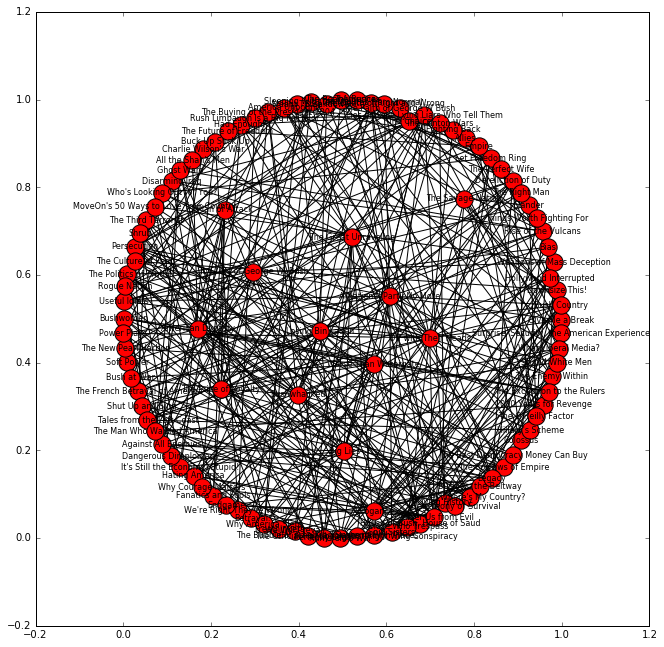

In [13]:
plt.figure(figsize=(11,11))
default_distance_between_nodes = 1.0/(math.sqrt(len(L.nodes())))
pos = nx.spring_layout(L, scale=1.0, k=5*default_distance_between_nodes)
nx.draw_networkx(L, pos, node_size=300, font_size=8)

##### Calculate Degree of Centrality for books and print out a top 10 list

In [14]:
def sorted_map(map):
    ms= sorted(map.iteritems(),key=lambda(k,v):(-v,k))
    return ms

In [15]:
#Compute Degree Of Centrality
d = nx.degree(L)
ds = sorted_map(d)
ds[0:9]

[(u'A National Party No More', 25),
 (u'Off with Their Heads', 25),
 (u'Bushwhacked', 23),
 (u'Losing Bin Laden', 23),
 (u'American Dynasty', 22),
 (u'Big Lies', 21),
 (u'The Great Unraveling', 21),
 (u'The Price of Loyalty', 20),
 (u'Arrogance', 18)]

##### Log graph of the top 10 degree centrality books

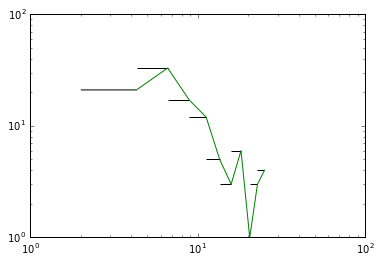

In [16]:
h= plt.hist(d.values(),10)
plt.loglog(h[1][1:],h[0])

###### Return a new graph object that contains the network with pendant and isolated nodes removed

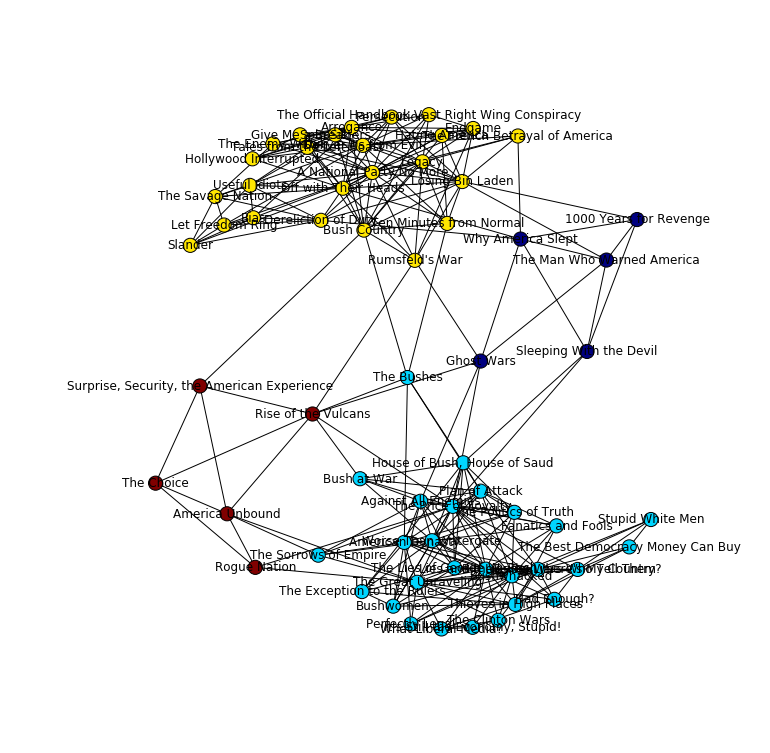

In [39]:
values = [part.get(node) for node in K_ud.nodes()]
plt.figure(figsize=(10,10))
pos=nx.drawing.spring_layout(K_ud)
nx.draw(K_ud, pos, cmap=plt.get_cmap('jet'), node_color = values, node_size=200, with_labels=True)

##### Determine if the p-value is higher/lower than 0.05 for each test

In [40]:

# Examine node data
print K_ud.nodes(data=True)[0:5]

[(u'Persecution', {'id': 13, 'value': u'c', 'label': u'Persecution'}), (u'Ghost Wars', {'id': 7, 'value': u'n', 'label': u'Ghost Wars'}), (u'The Clinton Wars', {'id': 97, 'value': u'l', 'label': u'The Clinton Wars'}), (u'Worse Than Watergate', {'id': 75, 'value': u'l', 'label': u'Worse Than Watergate'}), (u'Arrogance', {'id': 47, 'value': u'c', 'label': u'Arrogance'})]


In [56]:
from prettytable import PrettyTable

dcent=nx.degree_centrality(L)
dcent_s=sorted_map(dcent)

ccent=nx.closeness_centrality(L)
ccent_s=sorted_map(ccent)

bcent = nx.betweenness_centrality(L)
bcent_s = sorted_map(bcent)

ecent = nx.nx.eigenvector_centrality_numpy(L)
ecent_s = sorted_map(ecent)

names1=[x[0] for x in dcent_s[:10]]
names2=[x[0] for x in ccent_s[:10]]
names3=[x[0] for x in bcent_s[:10]]
names4=[x[0] for x in ecent_s[:10]]

names=list(set(names1)|set(names2)|set(names3)|set(names4))

table=[[name,L.degree(name),round(dcent[name],3),round(ccent[name],3),round(bcent[name],3),round(ecent[name],3),L.node[name]['value']] for name in names]

table=sorted(table,key=lambda x: -x[5])
pt = PrettyTable(['Node','Degree','Degree Cent.','Closeness Cent.','Betweenness Cent.','Eigen Cent.','Value'])
for i in range(0, len(table)):
    pt.add_row(table[i])
    
print pt

+----------------------------------------+--------+--------------+-----------------+-------------------+-------------+-------+
|                  Node                  | Degree | Degree Cent. | Closeness Cent. | Betweenness Cent. | Eigen Cent. | Value |
+----------------------------------------+--------+--------------+-----------------+-------------------+-------------+-------+
|              Bushwhacked               |   23   |    0.221     |      0.364      |       0.058       |    0.297    |   l   |
|                Big Lies                |   21   |    0.202     |       0.35      |       0.043       |    0.284    |   l   |
|            American Dynasty            |   22   |    0.212     |      0.394      |       0.091       |    0.271    |   l   |
|          The Price of Loyalty          |   20   |    0.192     |      0.414      |       0.139       |    0.259    |   l   |
|          The Great Unraveling          |   21   |    0.202     |      0.371      |       0.065       |    0.2

In [60]:
Liberal=[]
Conservative=[]
Neutral=[]

for i,j in L.nodes_iter(data=True):
    if j['value']=='l':
        Liberal.append(i)
    elif j['value']=='n':
        Neutral.append(i)
    elif j['value']=='c':
        Conservative.append(i)


In [69]:
# Create function to generate categorical tables

def productstats(L):
    dcent=nx.degree_centrality(L)
    dcent_s=sorted_map(dcent)

    ccent=nx.closeness_centrality(L)
    ccent_s=sorted_map(ccent)

    bcent = nx.betweenness_centrality(L)
    bcent_s = sorted_map(bcent)

    ecent = nx.eigenvector_centrality_numpy(L)
    ecent_s = sorted_map(ecent)

    names1=[x[0] for x in dcent_s[:10]]
    names2=[x[0] for x in ccent_s[:10]]
    names3=[x[0] for x in bcent_s[:10]]
    names4=[x[0] for x in ecent_s[:10]]

    names=list(set(names1)|set(names2)|set(names3)|set(names4))

    table=[[name,L.degree(name),round(dcent[name],3),round(ccent[name],3),round(bcent[name],3),round(ecent[name],3),L.node[name]['value']] for name in names]

    table=sorted(table,key=lambda x: -x[5])
    pt = PrettyTable(['Node','Degree','Degree Cent.','Closeness Cent.','Betweenness Cent.','Eigen Cent.','Value'])
    for i in range(0, len(table)):
        pt.add_row(table[i])
    
    print pt

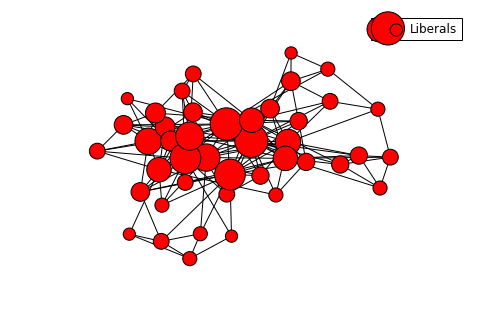

In [70]:

L_lib= L.subgraph(Liberal)
d = nx.degree(L_lib)
nx.draw_spring(L_lib, label = 'Liberals', node_color='r', node_size=[v * 50 for v in d.values()])
plt.legend(["Liberals"])
plt.show()

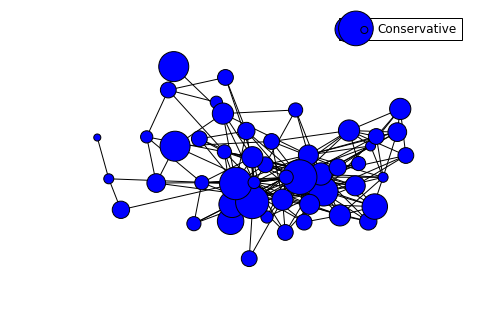

In [71]:
L_con= L.subgraph(Conservative)
d = nx.degree(L_con)
nx.draw_spring(L_con, label = 'Conservative', node_color='b', node_size=[v * 50 for v in d.values()])
plt.legend(["Conservative"])
plt.show()

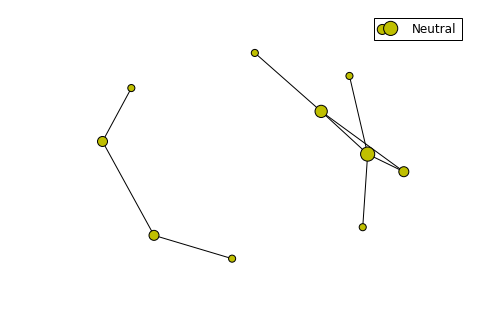

In [72]:
L_neu= L.subgraph(Neutral)
d = nx.degree(L_neu)
nx.draw_spring(L_neu, label = 'Neutral', node_color='y', node_size=[v * 50 for v in d.values()])
plt.legend(["Neutral"])
plt.show()

In [73]:
productstats(L_neu)

+---------------------------------------------+--------+--------------+-----------------+-------------------+-------------+-------+
|                     Node                    | Degree | Degree Cent. | Closeness Cent. | Betweenness Cent. | Eigen Cent. | Value |
+---------------------------------------------+--------+--------------+-----------------+-------------------+-------------+-------+
|              Why America Slept              |   4    |    0.333     |      0.347      |       0.106       |    0.599    |   n   |
|           Sleeping With the Devil           |   3    |     0.25     |      0.298      |       0.061       |    0.518    |   n   |
|            1000 Years for Revenge           |   2    |    0.167     |       0.26      |        0.0        |    0.457    |   n   |
|                  Ghost Wars                 |   1    |    0.083     |      0.208      |        0.0        |    0.245    |   n   |
|                 Meant To Be                 |   1    |    0.083     |     

In [74]:
productstats(L_con)

+----------------------------+--------+--------------+-----------------+-------------------+-------------+-------+
|            Node            | Degree | Degree Cent. | Closeness Cent. | Betweenness Cent. | Eigen Cent. | Value |
+----------------------------+--------+--------------+-----------------+-------------------+-------------+-------+
|  A National Party No More  |   24   |     0.5      |      0.649      |       0.134       |    0.344    |   c   |
|    Off with Their Heads    |   22   |    0.458     |      0.632      |       0.138       |    0.316    |   c   |
|      Losing Bin Laden      |   21   |    0.438     |      0.632      |       0.221       |    0.272    |   c   |
|           Legacy           |   18   |    0.375     |      0.593      |       0.096       |    0.262    |   c   |
|         Arrogance          |   17   |    0.354     |      0.545      |       0.048       |    0.251    |   c   |
|    Deliver Us from Evil    |   18   |    0.375     |      0.539      |        

In [75]:
productstats(L_lib)

+----------------------------------------+--------+--------------+-----------------+-------------------+-------------+-------+
|                  Node                  | Degree | Degree Cent. | Closeness Cent. | Betweenness Cent. | Eigen Cent. | Value |
+----------------------------------------+--------+--------------+-----------------+-------------------+-------------+-------+
|              Bushwhacked               |   22   |    0.524     |      0.656      |       0.147       |    0.328    |   l   |
|                Big Lies                |   21   |     0.5      |      0.656      |       0.147       |    0.324    |   l   |
|            American Dynasty            |   19   |    0.452     |      0.618      |       0.102       |    0.282    |   l   |
|          The Great Unraveling          |   19   |    0.452     |      0.646      |       0.153       |    0.274    |   l   |
|       The Lies of George W. Bush       |   16   |    0.381     |      0.592      |       0.052       |    0.2

In [76]:
# Centrality
dcl=nx.degree_centrality(L_lib)
ccl=nx.closeness_centrality(L_lib)
bcl=nx.betweenness_centrality(L_lib)
ecl=nx.eigenvector_centrality_numpy(L_lib)

dcc=nx.degree_centrality(L_con)
ccc=nx.closeness_centrality(L_con)
bcc=nx.betweenness_centrality(L_con)
ecc=nx.eigenvector_centrality_numpy(L_con)

dcn=nx.degree_centrality(L_neu)
ccn=nx.closeness_centrality(L_neu)
bcn=nx.betweenness_centrality(L_neu)
ecn=nx.eigenvector_centrality_numpy(L_neu)


In [90]:
dcla=[]
dcca=[]
dcna=[]

for key, value in dcl.items():
    dcla.append(value)
    
for key, value in dcc.items():
    dcca.append(value)
    
for key, value in dcn.items():
    dcna.append(value)


In [91]:
# compute one-way ANOVA for DEGREE CENTRALITY  P value (p > 0.05, not statistically different)  
from scipy import stats  
      
f_val, p_val_DC = stats.f_oneway(dcla, dcca, dcna)  
  
print "One-way ANOVA P =", p_val_DC

One-way ANOVA P = 0.118827939231


In [92]:
ccla=[]
ccca=[]
ccna=[]

for key, value in dcl.items():
    ccla.append(value)
    
for key, value in ccc.items():
    ccca.append(value)
    
for key, value in ccn.items():
    ccna.append(value)

In [93]:
# compute one-way ANOVA P value (p > 0.05, not statistically different)  
from scipy import stats  
      
f_val, p_val_CC = stats.f_oneway(ccla, ccca, ccna)  
  
print "One-way ANOVA P =", p_val_CC

One-way ANOVA P = 6.28366765523e-25


In [94]:
bcla=[]
bcca=[]
bcna=[]

for key, value in bcl.items():
    bcla.append(value)
    
for key, value in bcc.items():
    bcca.append(value)
    
for key, value in bcn.items():
    bcna.append(value)

In [99]:
# compute one-way ANOVA P value (p > 0.05, not statistically different)  
from scipy import stats  
      
f_val, p_val_BC = stats.f_oneway(bcla, bcca, bcna)  
  
print "One-way ANOVA P =", p_val_BC

One-way ANOVA P = 0.776634720915


In [100]:
ecla=[]
ecca=[]
ecna=[]

for key, value in ecl.items():
    ecla.append(value)
    
for key, value in ecc.items():
    ecca.append(value)
    
for key, value in ecn.items():
    ecna.append(value)

In [101]:
# compute one-way ANOVA P value (p > 0.05, not statistically different)  
from scipy import stats  
      
f_val, p_val_EC = stats.f_oneway(ecla, ecca, ecna)  
  
print "One-way ANOVA P =", p_val_EC

One-way ANOVA P = 0.244352676527


In [136]:
p_val = pd.DataFrame({'pVal':[p_val_DC,p_val_CC,p_val_BC,p_val_EC]})

p_val=p_val.rename({0:'DEgree Centrality',1: 'Closeness Centrality', 2: 'Betweenness Centrality',3:'Eigenvector Centrality'})



In [137]:
p_val

,pVal
DEgree Centrality,1.188279e-01
Closeness Centrality,6.283668e-25
Betweenness Centrality,7.766347e-01
Eigenvector Centrality,2.443527e-01


#### Conclusion: Georgia Please help in conclusion